In [1]:
import os
import glob
import spacy
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
from collections import Counter

In [56]:
# Author: Zhile Xu
# UUN: s2500393

## Data Loading

In [4]:
# load spacy model
nlp = spacy.load("en_core_web_lg")

def load_data(base_dir):
    data = []
    labels = []
    
    for label in ['positive', 'negative']:
        for filepath in glob.glob(os.path.join(base_dir, label, '*.txt')):
            with open(filepath, 'r', encoding='utf-8') as file:
                data.append(file.read())
                labels.append(1 if label == 'positive' else 0)
                
    return data, labels

# Load training data
train_data, train_labels = load_data('data/train')

# preprocess the texts
def preprocess_texts(texts):
    docs = [nlp(text) for text in texts]
    return docs

# preprocess the training data
docs = preprocess_texts(train_data)

# separate positive and negative documents
positive_docs = [doc for doc, label in zip(docs, train_labels) if label == 1]
negative_docs = [doc for doc, label in zip(docs, train_labels) if label == 0]


In [61]:
# calculate the number of labels in training data
num_train_positive = sum(train_labels)
num_train_negative = len(train_labels) - num_train_positive
print(f'Number of positive labels (train): {num_train_positive}')
print(f'Number of negative labels (train): {num_train_negative}')
# calculate the percentage of positive labels in training data
percent_train_positive = num_train_positive / len(train_labels) * 100
percent_train_negative = 100 - percent_train_positive
print(f'Percentage of positive labels (train): {percent_train_positive:.2f}%')
print(f'Percentage of negative labels (train): {percent_train_negative:.2f}%')

print("-----------------------------")

# load test data
test_data, test_labels = load_data('data/test')
# calculate the number of labels in test data
num_test_positive = sum(test_labels)
num_test_negative = len(test_labels) - num_test_positive
print(f'Number of positive labels (test): {num_test_positive}')
print(f'Number of negative labels (test): {num_test_negative}')
# calculate the percentage of positive labels in test data
percent_test_positive = num_test_positive / len(test_labels) * 100
percent_test_negative = 100 - percent_test_positive
print(f'Percentage of positive labels (test): {percent_test_positive:.2f}%')
print(f'Percentage of negative labels (test): {percent_test_negative:.2f}%')

Number of positive labels (train): 224
Number of negative labels (train): 221
Percentage of positive labels (train): 50.34%
Percentage of negative labels (train): 49.66%
-----------------------------
Number of positive labels (test): 56
Number of negative labels (test): 56
Percentage of positive labels (test): 50.00%
Percentage of negative labels (test): 50.00%


## Length Analysis

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


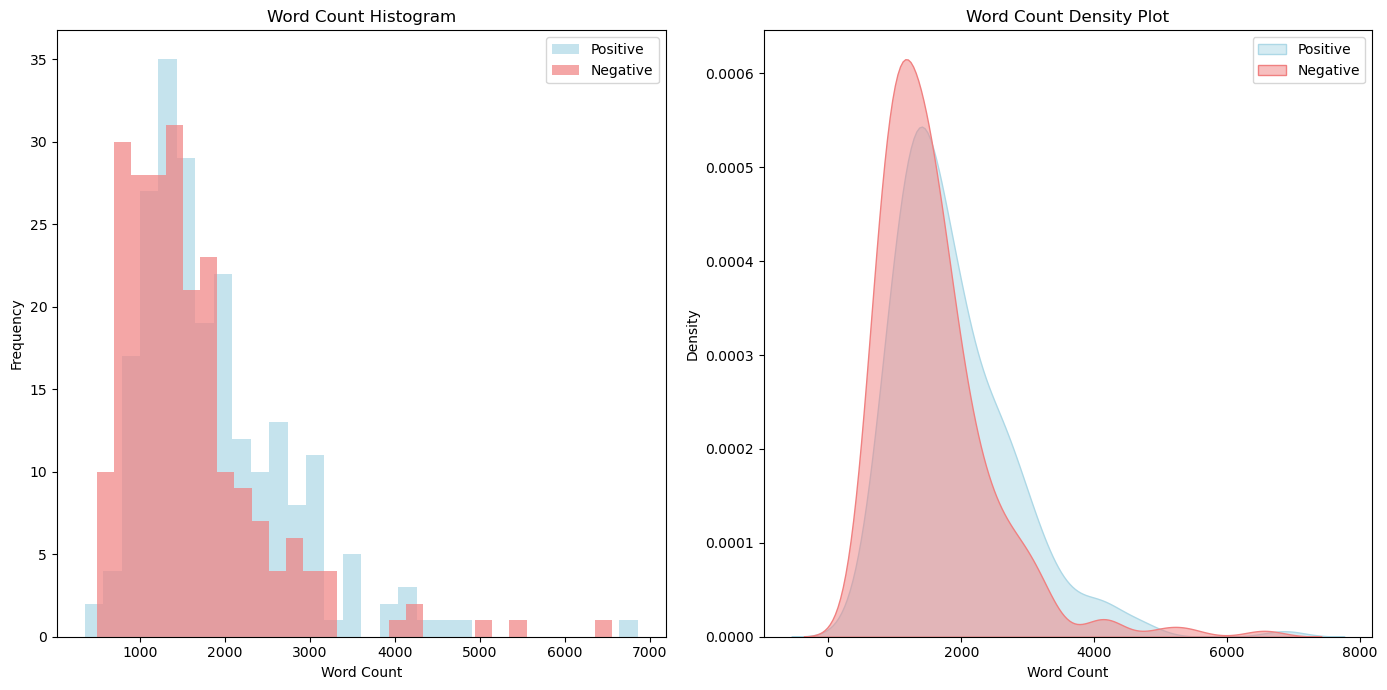

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


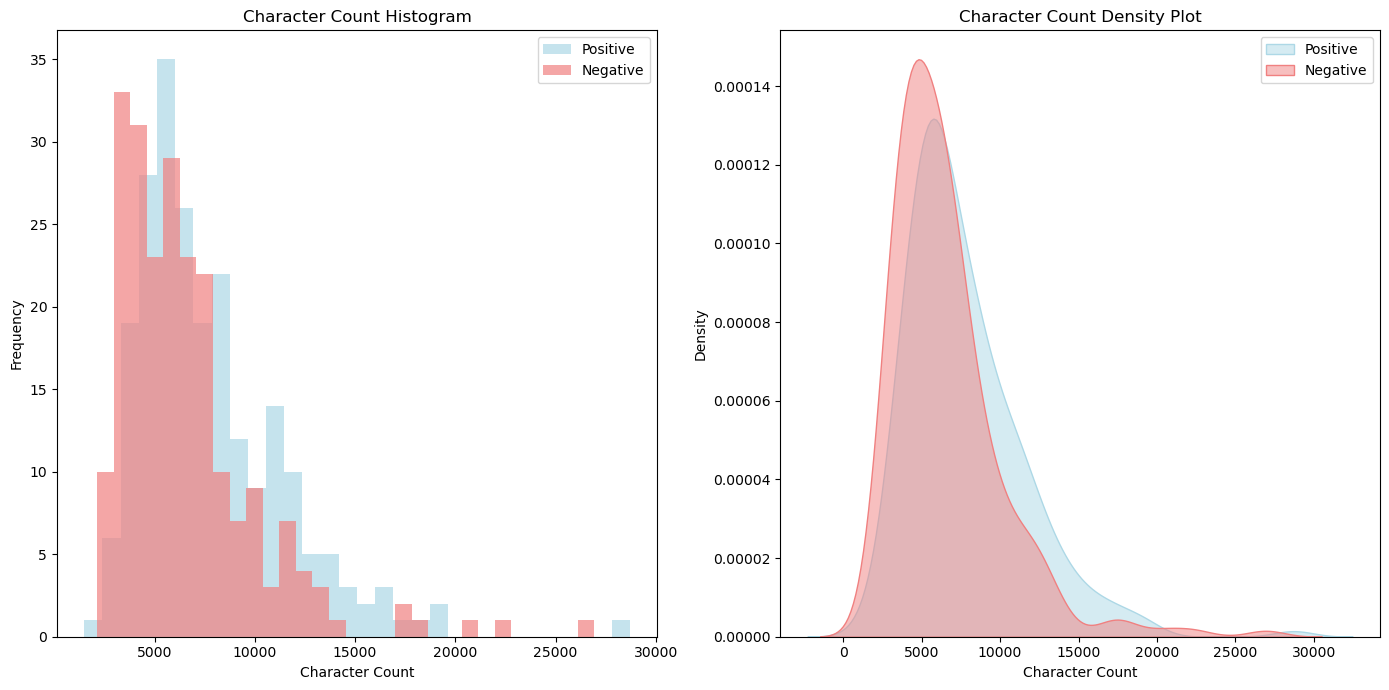

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


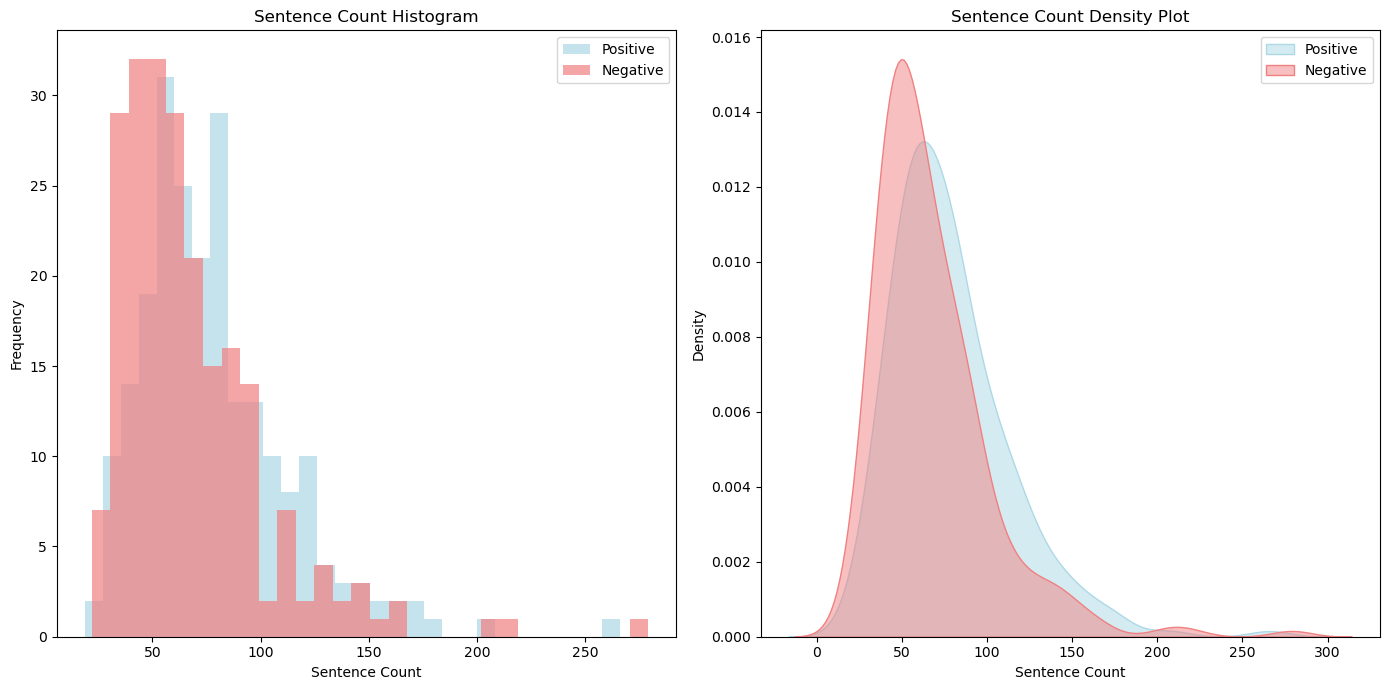

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


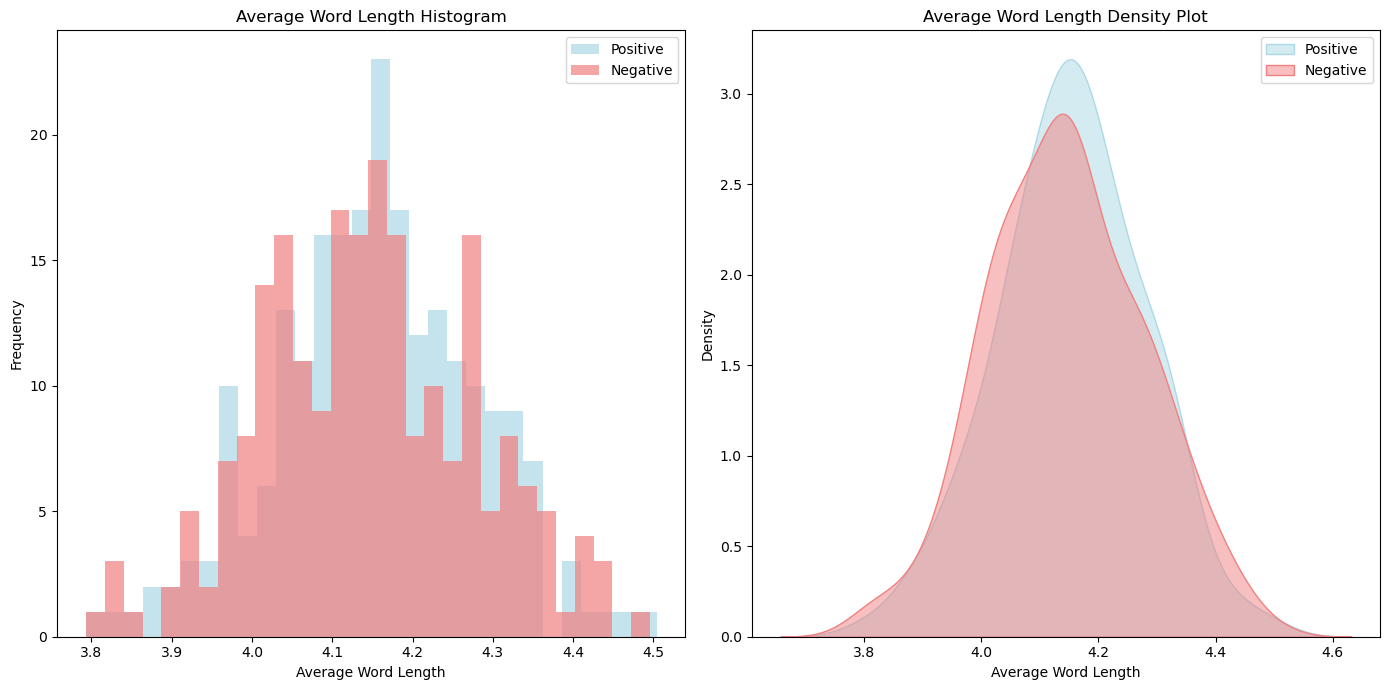

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


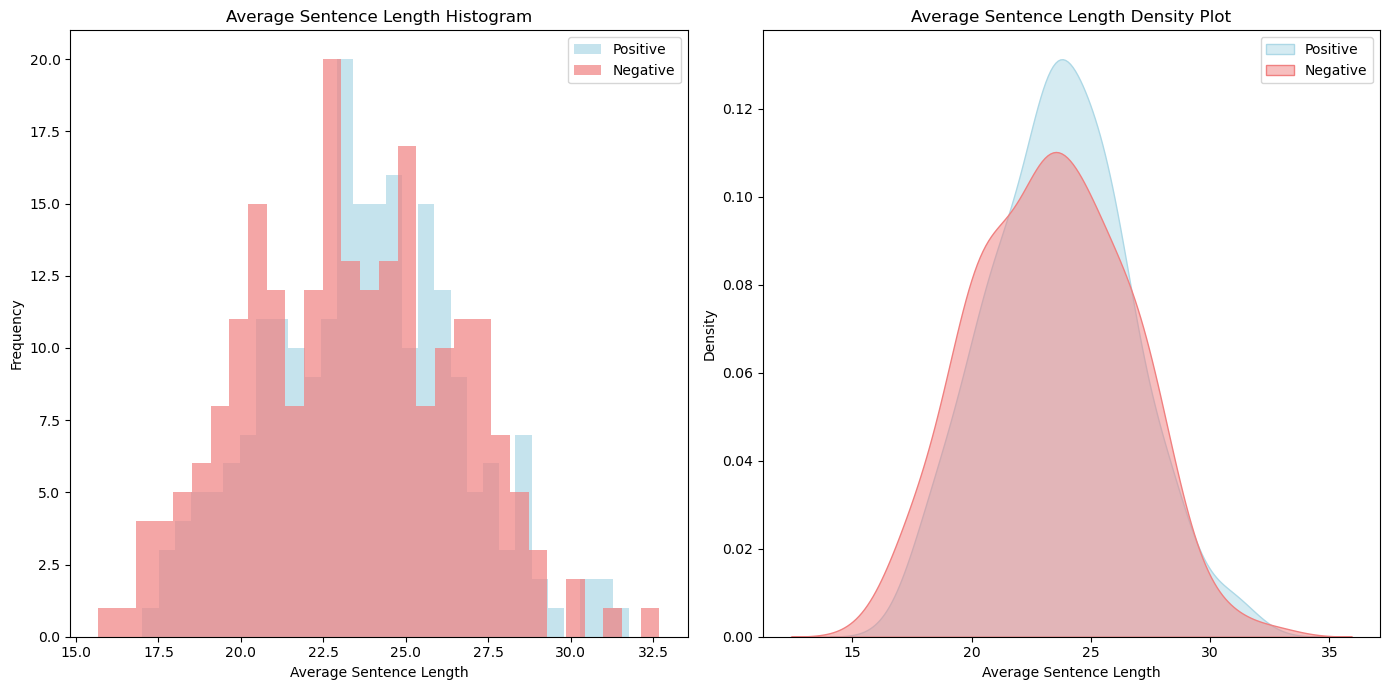

/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


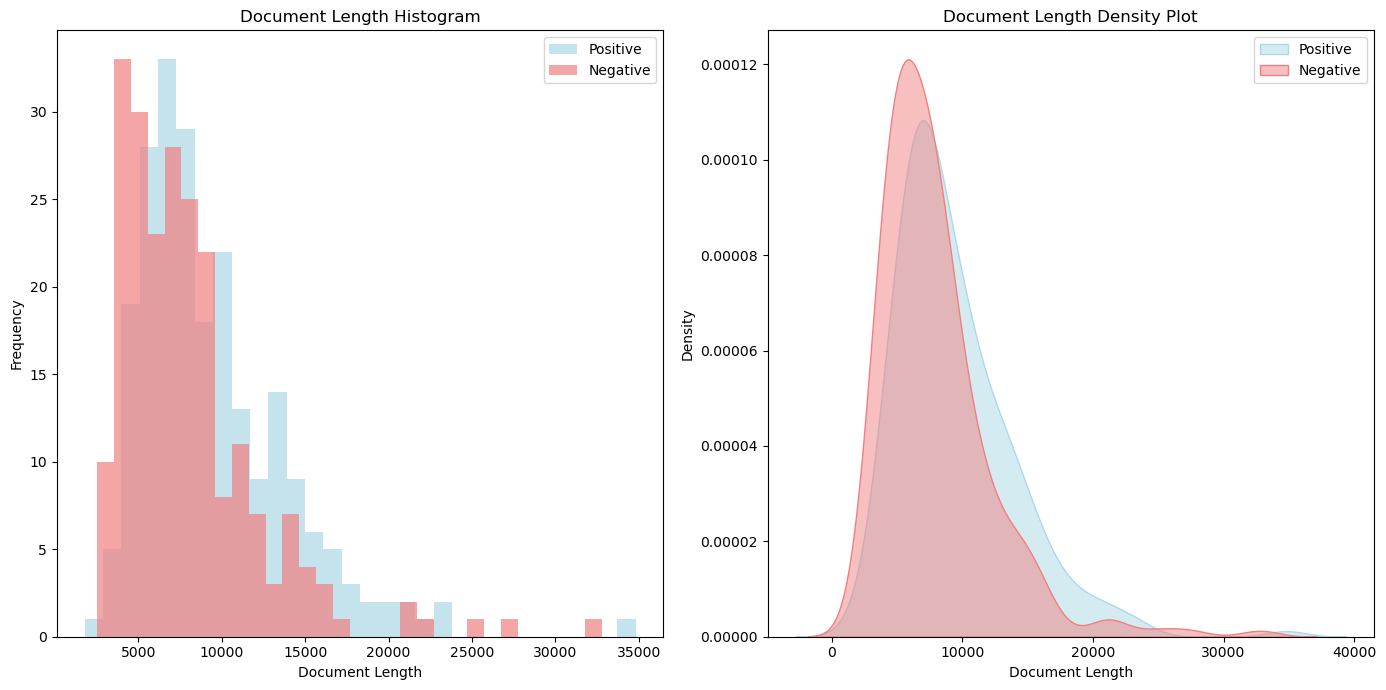

In [3]:
# function to calculate the metrics
def calculate_metrics(docs):
    word_counts = [len(doc) for doc in docs]
    char_counts = [sum(len(token) for token in doc) for doc in docs]
    sentence_counts = [len(list(doc.sents)) for doc in docs]
    avg_word_lengths = [char_count / word_count if word_count != 0 else 0 for char_count, word_count in zip(char_counts, word_counts)]
    avg_sentence_lengths = [word_count / sent_count if sent_count != 0 else 0 for word_count, sent_count in zip(word_counts, sentence_counts)]
    doc_lengths = [len(doc.text) for doc in docs]  
    
    return word_counts, char_counts, sentence_counts, avg_word_lengths, avg_sentence_lengths, doc_lengths

# calculate metrics for positive and negative documents
pos_word_counts, pos_char_counts, pos_sentence_counts, pos_avg_word_lengths, pos_avg_sentence_lengths, pos_doc_lengths = calculate_metrics(positive_docs)
neg_word_counts, neg_char_counts, neg_sentence_counts, neg_avg_word_lengths, neg_avg_sentence_lengths, neg_doc_lengths = calculate_metrics(negative_docs)

# function to plot the metrics
def plot_metrics(pos_metrics, neg_metrics, metric_name):
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    
    # histogram
    axs[0].hist(pos_metrics, bins=30, alpha=0.7, color='lightblue', label='Positive')
    axs[0].hist(neg_metrics, bins=30, alpha=0.7, color='lightcoral', label='Negative')
    axs[0].set_title(f'{metric_name} Histogram')
    axs[0].set_xlabel(metric_name)
    axs[0].set_ylabel('Frequency')
    axs[0].legend(loc='upper right')
    
    # density Plot
    sns.kdeplot(pos_metrics, ax=axs[1], color='lightblue', label='Positive', fill=True, alpha=0.5)
    sns.kdeplot(neg_metrics, ax=axs[1], color='lightcoral', label='Negative', fill=True, alpha=0.5)
    axs[1].set_title(f'{metric_name} Density Plot')
    axs[1].set_xlabel(metric_name)
    axs[1].set_ylabel('Density')
    axs[1].legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# plotting all metrics
metrics = [
    ('Word Count', pos_word_counts, neg_word_counts),
    ('Character Count', pos_char_counts, neg_char_counts),
    ('Sentence Count', pos_sentence_counts, neg_sentence_counts),
    ('Average Word Length', pos_avg_word_lengths, neg_avg_word_lengths),
    ('Average Sentence Length', pos_avg_sentence_lengths, neg_avg_sentence_lengths),
    ('Document Length', pos_doc_lengths, neg_doc_lengths) 
]

for metric_name, pos_metric, neg_metric in metrics:
    plot_metrics(pos_metric, neg_metric, metric_name)

In [53]:
# calculate the average word length for positive and negative documents
avg_pos_word_length = sum(pos_avg_word_lengths) / len(pos_avg_word_lengths)
avg_neg_word_length = sum(neg_avg_word_lengths) / len(neg_avg_word_lengths)
print(f'Average word length for positive documents: {avg_pos_word_length:.2f}')
print(f'Average word length for negative documents: {avg_neg_word_length:.2f}')
# calculate the average word length for the whole dataset
avg_word_length = sum(pos_avg_word_lengths + neg_avg_word_lengths) / len(train_labels)
print(f'Average word length for the whole dataset: {avg_word_length:.2f}')

print('----------------------------------------')

# calculate the average sentence length for positive and negative documents
avg_pos_sent_length = sum(pos_avg_sentence_lengths) / len(pos_avg_sentence_lengths)
avg_neg_sent_length = sum(neg_avg_sentence_lengths) / len(neg_avg_sentence_lengths)
print(f'Average sentence length for positive documents: {avg_pos_sent_length:.2f}')
print(f'Average sentence length for negative documents: {avg_neg_sent_length:.2f}')
# calculate the average sentence length for the whole dataset
avg_sent_length = sum(pos_avg_sentence_lengths + neg_avg_sentence_lengths) / len(train_labels)
print(f'Average sentence length for the whole dataset: {avg_sent_length:.2f}')

print('----------------------------------------')

# calculate the average document length for positive and negative documents
avg_pos_doc_length = sum(pos_doc_lengths) / len(pos_doc_lengths)
avg_neg_doc_length = sum(neg_doc_lengths) / len(neg_doc_lengths)
print(f'Average document length for positive documents: {avg_pos_doc_length:.2f}')
print(f'Average document length for negative documents: {avg_neg_doc_length:.2f}')
# calculate the average document length for the whole dataset
avg_doc_length = sum(pos_doc_lengths + neg_doc_lengths) / len(train_labels)
print(f'Average document length for the whole dataset: {avg_doc_length:.2f}')

print('----------------------------------------')

# calculate the average word count for positive and negative documents
avg_pos_word_count = sum(pos_word_counts) / len(pos_word_counts)
avg_neg_word_count = sum(neg_word_counts) / len(neg_word_counts)
print(f'Average word count for positive documents: {avg_pos_word_count:.2f}')
print(f'Average word count for negative documents: {avg_neg_word_count:.2f}')
# calculate the average word count for the whole dataset
avg_word_count = sum(pos_word_counts + neg_word_counts) / len(train_labels)
print(f'Average word count for the whole dataset: {avg_word_count:.2f}')

print('----------------------------------------')

# calculate the average character count for positive and negative documents
avg_pos_char_count = sum(pos_char_counts) / len(pos_char_counts)
avg_neg_char_count = sum(neg_char_counts) / len(neg_char_counts)
print(f'Average character count for positive documents: {avg_pos_char_count:.2f}')
print(f'Average character count for negative documents: {avg_neg_char_count:.2f}')
# calculate the average character count for the whole dataset
avg_char_count = sum(pos_char_counts + neg_char_counts) / len(train_labels)
print(f'Average character count for the whole dataset: {avg_char_count:.2f}')
print('----------------------------------------')

# calculate the average sentence count for positive and negative documents
avg_pos_sent_count = sum(pos_sentence_counts) / len(pos_sentence_counts)
avg_neg_sent_count = sum(neg_sentence_counts) / len(neg_sentence_counts)
print(f'Average sentence count for positive documents: {avg_pos_sent_count:.2f}')
print(f'Average sentence count for negative documents: {avg_neg_sent_count:.2f}')
# calculate the average sentence count for the whole dataset
avg_sent_count = sum(pos_sentence_counts + neg_sentence_counts) / len(train_labels)
print(f'Average sentence count for the whole dataset: {avg_sent_count:.2f}')


Average word length for positive documents: 4.15
Average word length for negative documents: 4.15
Average word length for the whole dataset: 4.15
----------------------------------------
Average sentence length for positive documents: 23.69
Average sentence length for negative documents: 23.32
Average sentence length for the whole dataset: 23.51
----------------------------------------
Average document length for positive documents: 9422.53
Average document length for negative documents: 7945.38
Average document length for the whole dataset: 8688.93
----------------------------------------
Average word count for positive documents: 1870.49
Average word count for negative documents: 1579.99
Average word count for the whole dataset: 1726.22
----------------------------------------
Average character count for positive documents: 7762.51
Average character count for negative documents: 6552.00
Average character count for the whole dataset: 7161.34
----------------------------------------
Av

In [55]:
# calculate the unique words in the documents
def calculate_unique_words(docs):
    words = [token.text.lower() for doc in docs for token in doc if token.is_alpha]
    unique_words = set(words)
    return len(unique_words)

# calculate the number of unique words in positive and negative documents
num_unique_pos = calculate_unique_words(positive_docs)
num_unique_neg = calculate_unique_words(negative_docs)
print(f'Number of unique words in positive documents: {num_unique_pos}')
print(f'Number of unique words in negative documents: {num_unique_neg}')
# calculate the number of unique words in the whole dataset
num_unique = calculate_unique_words(docs)
print(f'Number of unique words in the whole dataset: {num_unique}')

print('----------------------------------------')

# calculate the lexical diversity of the documents
def calculate_lexical_diversity(docs):
    words = [token.text.lower() for doc in docs for token in doc if token.is_alpha]
    unique_words = set(words)
    num_words = len(words)
    if num_words > 0:
        return len(unique_words) / num_words
    else:
        return 0

# calculate the lexical diversity of positive and negative documents
lex_div_pos = calculate_lexical_diversity(positive_docs)
lex_div_neg = calculate_lexical_diversity(negative_docs)
print(f'Lexical diversity of positive documents: {lex_div_pos:.2f}')
print(f'Lexical diversity of negative documents: {lex_div_neg:.2f}')
# calculate the lexical diversity of the whole dataset
lex_div = calculate_lexical_diversity(docs)
print(f'Lexical diversity of the whole dataset: {lex_div:.2f}')

Number of unique words in positive documents: 6793
Number of unique words in negative documents: 6527
Number of unique words in the whole dataset: 8688
----------------------------------------
Lexical diversity of positive documents: 0.02
Lexical diversity of negative documents: 0.02
Lexical diversity of the whole dataset: 0.01


## Process the Stop Words and Punctuation

In [57]:
# function to remove stopwords and punctuation
def remove_stopwords_punctuation(doc):
    # remove stopwords and punctuation
    doc = [token for token in doc if not token.is_stop and not token.is_punct]
    # remove "\n", "Mr", "Mrs", "Miss" and "Ms"
    doc = [token for token in doc if token.text not in ['\n', 'Mr', 'Mrs', 'Miss', 'Ms']]
    # remove single characters
    doc = [token for token in doc if len(token.text) > 1]
    return doc
cleaned_docs = [remove_stopwords_punctuation(doc) for doc in docs]

In [58]:
positive_cleaned_docs = [doc for doc, label in zip(cleaned_docs, train_labels) if label == 1]
negative_cleaned_docs = [doc for doc, label in zip(cleaned_docs, train_labels) if label == 0]

# function to count tokens
def count_tokens(docs):
    return [len(doc) for doc in docs]

# count tokens for original and cleaned documents
original_token_counts = count_tokens(docs)
cleaned_token_counts = count_tokens(cleaned_docs)

# count tokens for positive and negative documents
pos_token_counts = count_tokens(positive_cleaned_docs)
neg_token_counts = count_tokens(negative_cleaned_docs)

# calculate the percentage of tokens removed
removed_tokens = [original - cleaned for original, cleaned in zip(original_token_counts, cleaned_token_counts)]
removed_tokens_percentage = [removed / original * 100 if original != 0 else 0 for original, removed in zip(original_token_counts, removed_tokens)]
print(f'Average Percentage of Tokens Removed: {sum(removed_tokens_percentage) / len(removed_tokens_percentage):.2f}%')

Average Percentage of Tokens Removed: 62.23%


## Lemmatization and Lowercase

In [60]:
##  Lowercase and lemmatise the tokens
def lowercase_and_lemmatise(docs):
    lemmatised_docs = []
    for doc in docs:
        lemmatised_tokens = [token.lemma_.lower() for token in doc]
        
        lemmatised_docs.append(lemmatised_tokens)
    return lemmatised_docs

# lowercase and lemmatise the tokens
lemmatised_positive_docs = lowercase_and_lemmatise(positive_cleaned_docs)
lemmatised_negative_docs = lowercase_and_lemmatise(negative_cleaned_docs)

# calculate the unique lemmatised words
num_unique_lemmatised_pos = set([token for doc in lemmatised_positive_docs for token in doc])
num_unique_lemmatised_neg = set([token for doc in lemmatised_negative_docs for token in doc])
num_unique_lemmatised = set([token for doc in lemmatised_positive_docs + lemmatised_negative_docs for token in doc])
print(f'Number of unique lemmatised words in positive documents: {len(num_unique_lemmatised_pos)}')
print(f'Number of unique lemmatised words in negative documents: {len(num_unique_lemmatised_neg)}')
print(f'Number of unique lemmatised words in the whole dataset: {len(num_unique_lemmatised)}')

Number of unique lemmatised words in positive documents: 5450
Number of unique lemmatised words in negative documents: 5060
Number of unique lemmatised words in the whole dataset: 7155


## Compute the Most Common N-grams

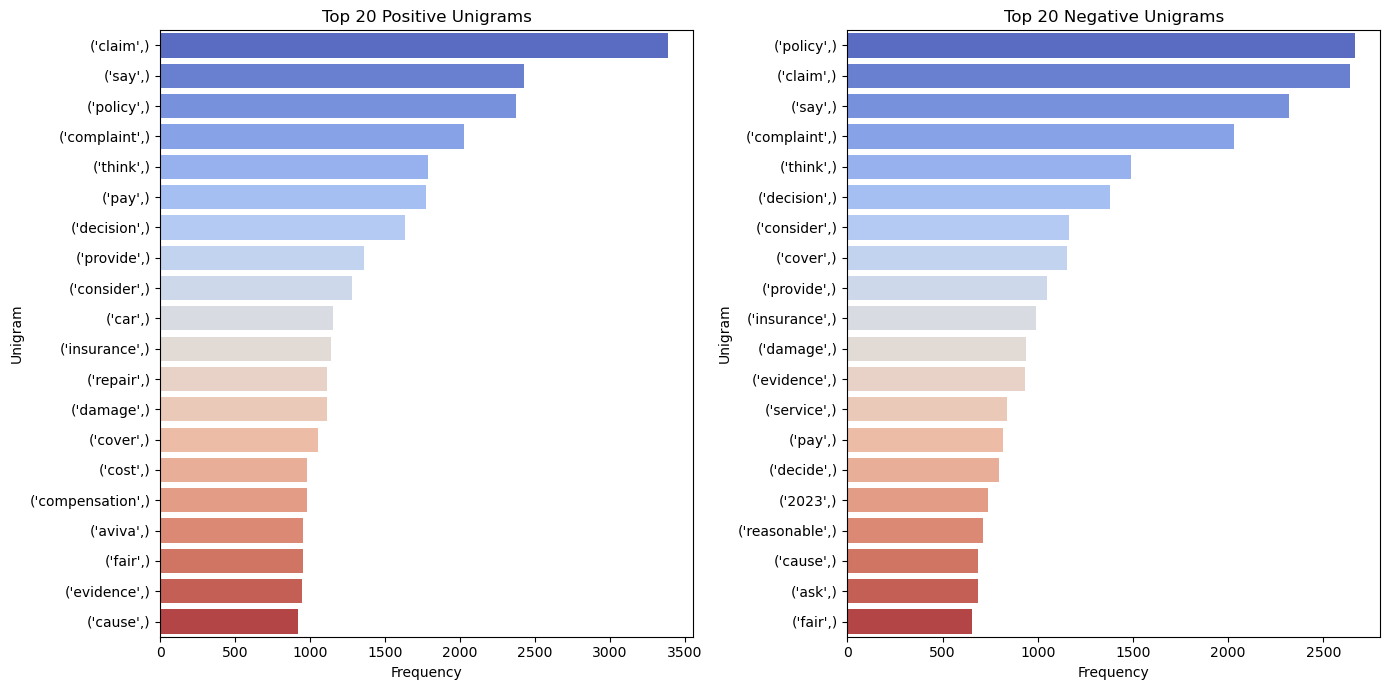

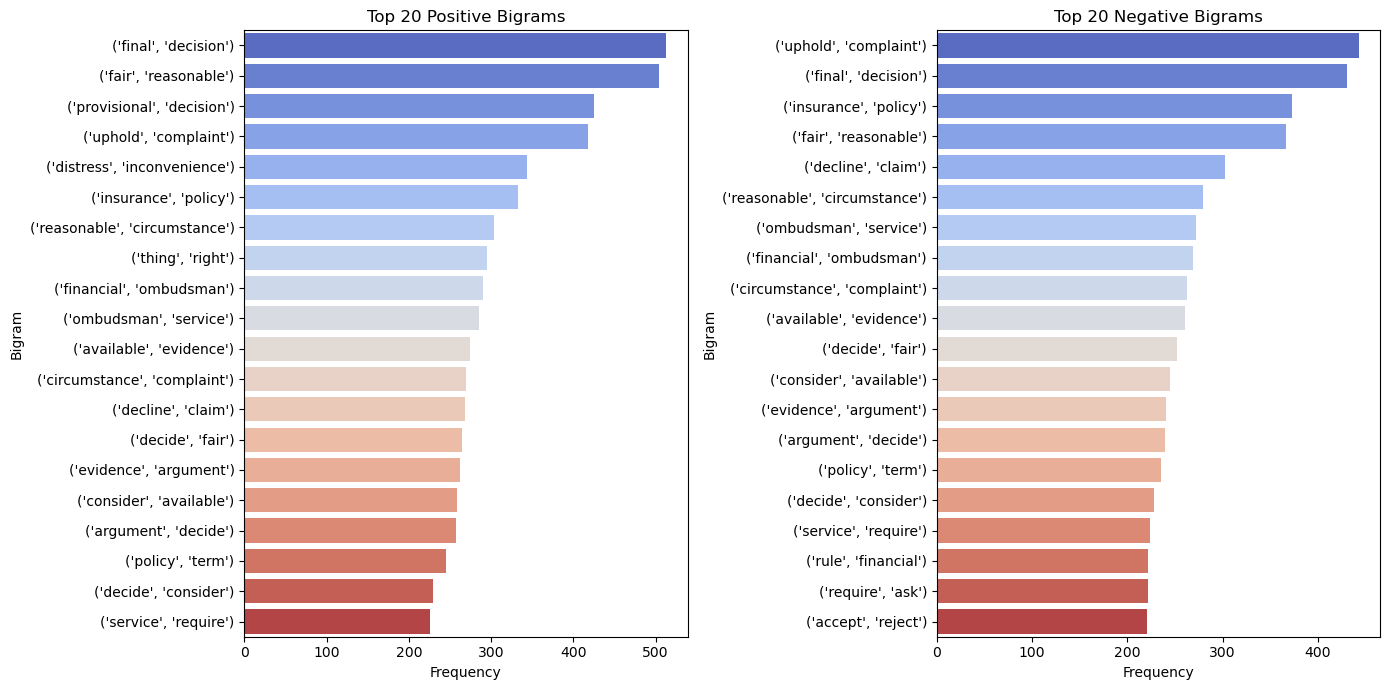

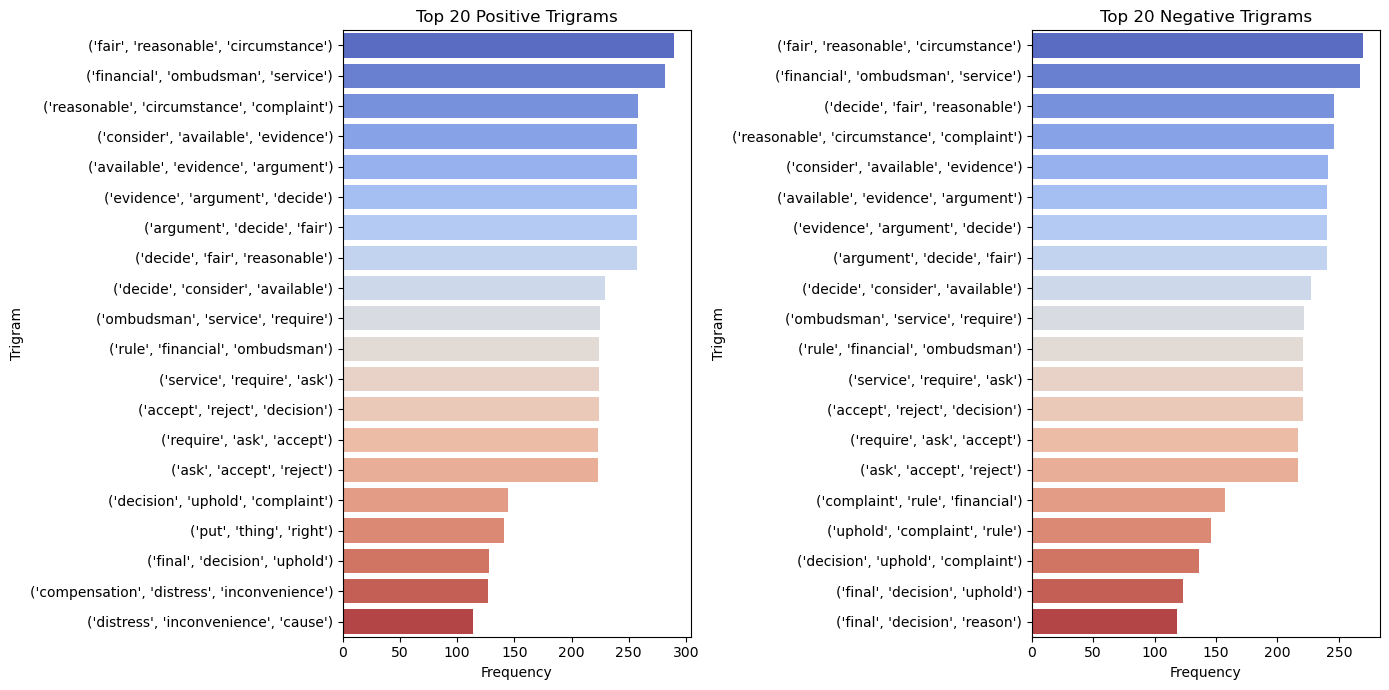

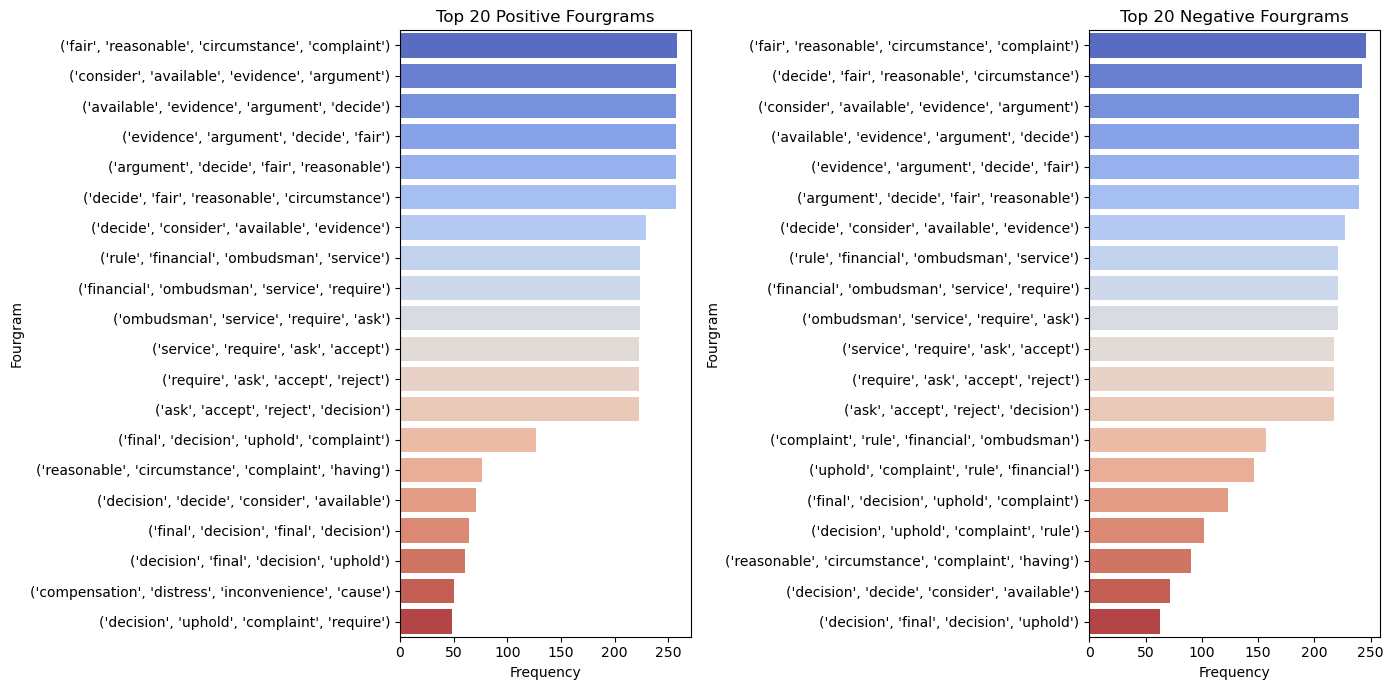

In [30]:
# What are the most common tokens, bigrams, trigrams and fourgrams?
from nltk.util import ngrams
# function to extract n-grams
def extract_ngrams(docs, n):
    ngram_counts = Counter()
    for doc in docs:
        ngram_counts.update(ngrams(doc, n))
    return ngram_counts

# extract n-grams for positive and negative documents
positive_unigrams = extract_ngrams(lemmatised_positive_docs, 1)
negative_unigrams = extract_ngrams(lemmatised_negative_docs, 1)
positive_bigrams = extract_ngrams(lemmatised_positive_docs, 2)
negative_bigrams = extract_ngrams(lemmatised_negative_docs, 2)
positive_trigrams = extract_ngrams(lemmatised_positive_docs, 3)
negative_trigrams = extract_ngrams(lemmatised_negative_docs, 3)
positive_fourgrams = extract_ngrams(lemmatised_positive_docs, 4)
negative_fourgrams = extract_ngrams(lemmatised_negative_docs, 4)

# function to plot n-grams

def plot_ngrams(positive_ngrams, negative_ngrams, ngram_name, num_ngrams=20):
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    
    # positive n-grams
    positive_ngram_df = pd.DataFrame(positive_ngrams.most_common(num_ngrams), columns=[ngram_name, 'Frequency'])
    # switch axes for better readability
    sns.barplot(x='Frequency', y=ngram_name, data=positive_ngram_df, ax=axs[0], palette='coolwarm')
    axs[0].set_title(f'Top {num_ngrams} Positive {ngram_name}s')
    
    # negative n-grams
    negative_ngram_df = pd.DataFrame(negative_ngrams.most_common(num_ngrams), columns=[ngram_name, 'Frequency'])
    sns.barplot(x='Frequency', y=ngram_name, data=negative_ngram_df, ax=axs[1], palette='coolwarm')
    axs[1].set_title(f'Top {num_ngrams} Negative {ngram_name}s')

    plt.tight_layout()

# plot unigrams
plot_ngrams(positive_unigrams, negative_unigrams, 'Unigram')

# plot bigrams
plot_ngrams(positive_bigrams, negative_bigrams, 'Bigram')

# plot trigrams
plot_ngrams(positive_trigrams, negative_trigrams, 'Trigram')

# plot fourgrams
plot_ngrams(positive_fourgrams, negative_fourgrams, 'Fourgram')
